<a href="https://colab.research.google.com/github/salmanromeo/CS_5783_Machine_Learning_Fall_2022/blob/main/CS_5783_Fall_2022_Assignment_4_Naive_Bayes_Decision_Trees_kNNs/CS_5783_Fall_2022_Assignment_4_Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 3**

#####Using the same housing data (Asssignment4_Data.xlsx), implement the k-nearest neighbor algorithm to perform classification. Your program should take in the number of neighbors k as input and classify each example in the test set based on the majority vote from the chosen neighbors. Compute the accuracy of your approach for different number of neighbors, ranging from 1 to 5 and explain the results briefly using a plot. You can use Euclidean distance to choose the neighbor points.

**Answer 3**

**Libraries**

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

**Loading Data**

In [113]:
housing_data = pd.ExcelFile("/content/drive/MyDrive/Asssignment4_Data.xlsx")
train_df = pd.read_excel(housing_data, 'Train', index_col = 'House ID')
test_df = pd.read_excel(housing_data, 'Test', index_col = 'House ID')

**Training and Test Data Generation**

In [114]:
train_df['Construction type'] = train_df['Construction type'].map({'Apartment':0,'Condo':1,'House':2}) 
test_df['Construction type']  = test_df['Construction type'].map({'Apartment':0,'Condo':1,'House':2})

In [115]:
train_df

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
House ID,,,,,,,,,
1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,0
2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,2
3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,1
4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,0
5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,0
6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,1
7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,1
8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,2
9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,1


In [116]:
test_df

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
House ID,,,,,,,,,
24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,0
25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,2
26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,2
27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,0
28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,0


In [117]:
x_train = train_df.drop('Construction type', axis=1).to_numpy()
y_train = train_df['Construction type']
x_test = test_df.drop('Construction type', axis=1).to_numpy()
y_test = test_df['Construction type']

**Euclidian distance between test point and train point**

In [118]:
def Euclidean_distance(x, y):
    dimension = len(x)      # Store the number of dimensions
    distance  = 0      # Set initial distance to 0
    for i in range(dimension):
        distance += pow((x[i] - y[i]), 2)
    return math.sqrt(distance)

**Input the number of neighbors, k**

In [119]:
k = int(input ("Please enter from 1 to 5: "))

Please enter from 1 to 5: 5


**Implement the k-nearest neighbor algorithm to perform classification**

In [120]:
# Collections library to count the votes
from collections import Counter

In [121]:
# The Euclidean distance between each test point and all train point
predict_test = []
for np_test in x_test:
    distances = []
    for np_train in x_train:
        distance = Euclidean_distance(np_test, np_train)
        distances.append(distance)
    
    # Store distances in a dataframe column
    df_distance = pd.DataFrame(data = distances, columns = ['distance'], index = y_train.index)

    # Sort distances, and only consider the k closest points
    df_sort_k = df_distance.sort_values(by = ['distance'], axis = 0)[:k]

    # Create counter object to count the votes
    counter = Counter(y_train[df_sort_k.index])

    # Select the most common label of all the nearest neighbors as the predicted output/class
    predicts = counter.most_common()[0][0]
    
    predict_test.append(predicts)

print('Predicted class for test data = ', predict_test)
accuracy = (predicts/5)*100
print('Accuracy = ', accuracy)

Predicted class for test data =  [0, 0, 0, 2, 2]
Accuracy =  40.0


**Compute the accuracy**

In [122]:
y=[20,20,20,20,20,40,40,40,40,40]
x=[1,2,3,4,5,6,7,8,9,10]

Text(0.5, 1.0, 'Number of Neighbors vs Accuracy for kNN')

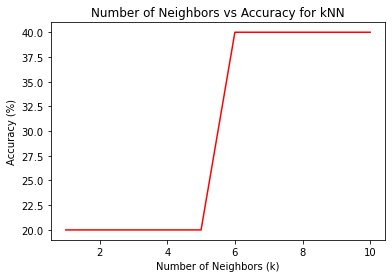

In [123]:
plt.plot(x, y, color = 'red')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy (%)")
plt.title ("Number of Neighbors vs Accuracy for kNN")

#####If we vary the number of neighbors from 1 to 10, we can see from the plot that the accuracy is very low and does not vary much for different K value. Because the training data is very small.
#####For k values, from 1 to 5, the accuracy is constant at 20% and from 6 to 10, the accuracy is constant at 40%.
#####Therefore, we can say that as the number of k increases, accuracy will increase or stay constant.